In [4]:
import json
import glob
from PIL import Image
import requests
import numpy as np
from matplotlib import pyplot as plt 
from mpl_toolkits.axes_grid1 import make_axes_locatable



In [11]:
def extract_img_heatmap(json_pth, normalize = False):
    with open(json_pth) as f:
        loaded_json = json.loads(f.readline())
        
    x = loaded_json['loss']
    target ='-'
    if 'target' in loaded_json:
        target = loaded_json['target']
    
    if normalize:
        facts = loaded_json['factors']
        for i, f in enumerate(facts):
            x[i+1] /= 1+sum([1-fi for fi in f])
    
    y = ((np.array(x[1:]))-np.array(x[0]))**2
    #y = ((np.array(x[1:])**2)-np.array(x[0])**2)**2
    y= y.reshape(30,30)
    
    fig,(ax1,ax2) = plt.subplots(1,2)
    
    expl = json_pth.split('_explanation_')[-1]
    ax1.set_title(json_pth.split('/')[-3] + " // " + target +' _' +expl)
    raw_image = Image.open(loaded_json['img'])
    raw_image.resize((300,300))
    ax1.imshow(raw_image)
    ax1.axis('off')
    
    im2 = ax2.imshow(y)
    divider = make_axes_locatable(ax2)

    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im2, cax=cax, orientation='vertical')

    #ax2.imshow(y>.01)
    ax2.axis('off')
    #ax2.colorbar()
    return y

/tmp/ipykernel_139566/3178146230.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,(ax1,ax2) = plt.subplots(1,2)


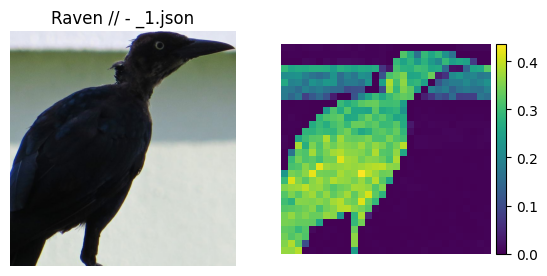

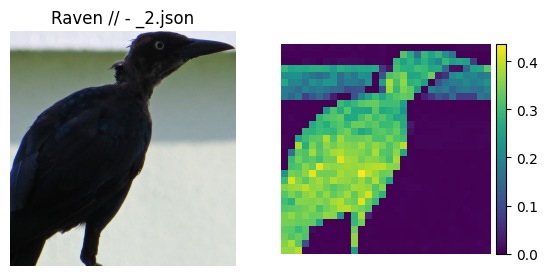

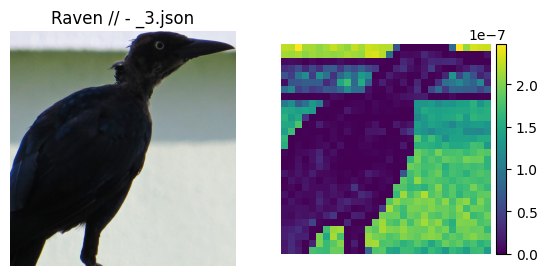

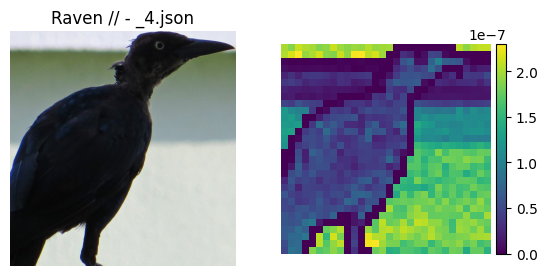

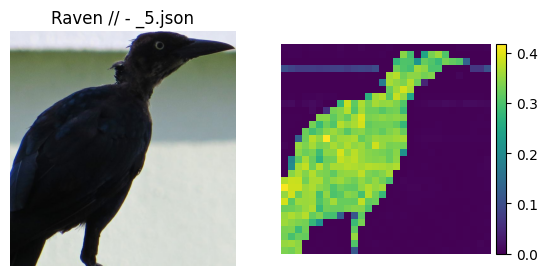

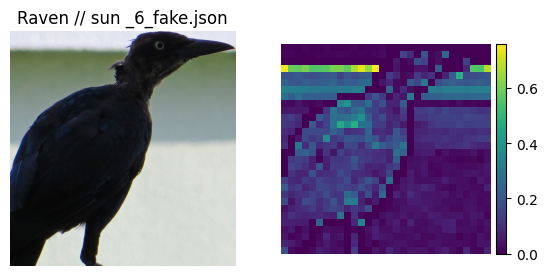

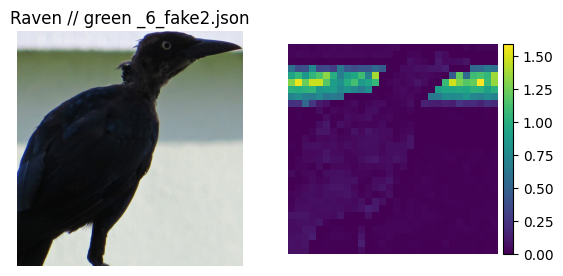

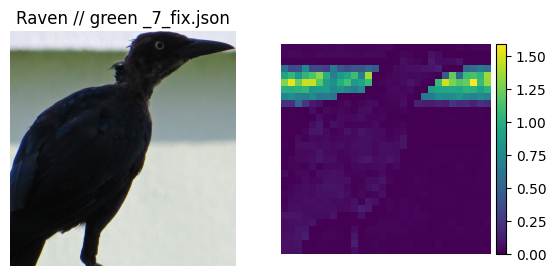

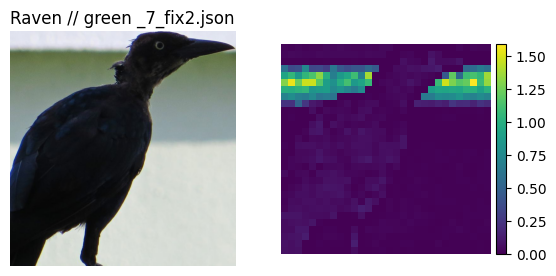

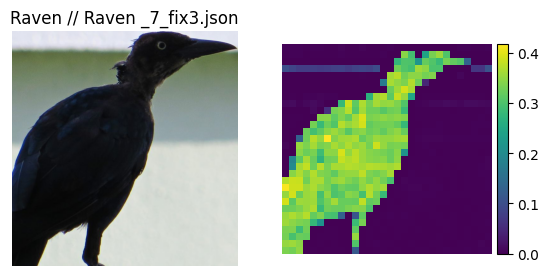

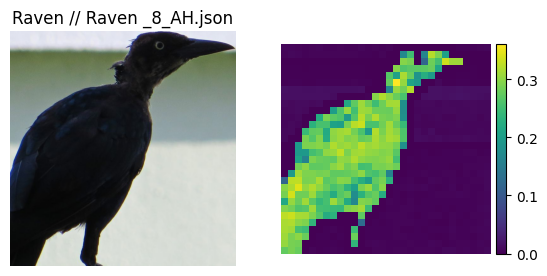

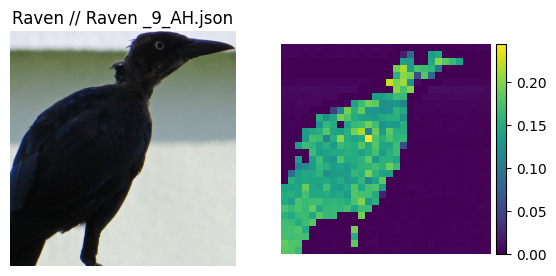

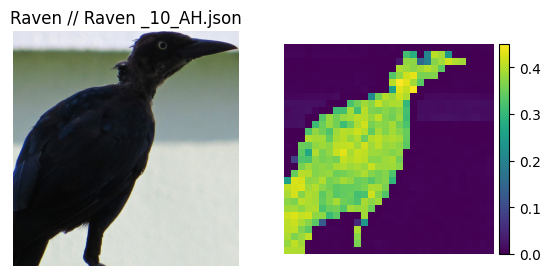

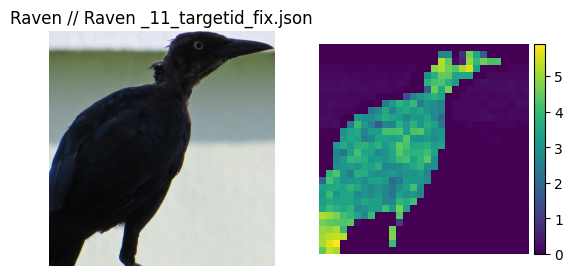

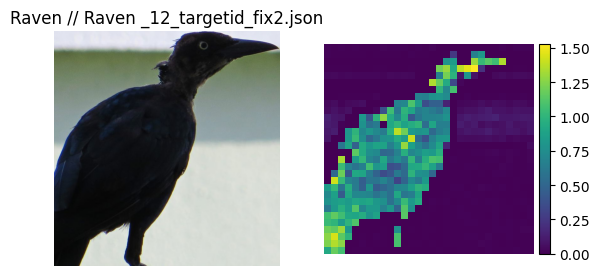

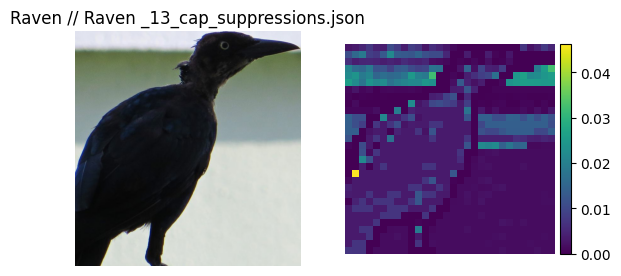

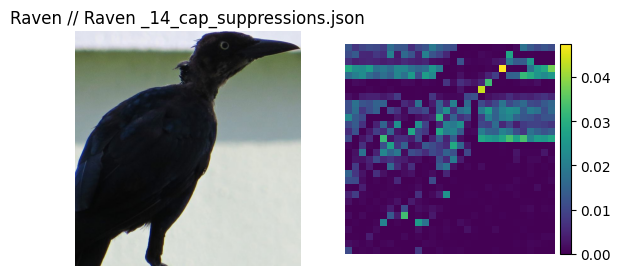

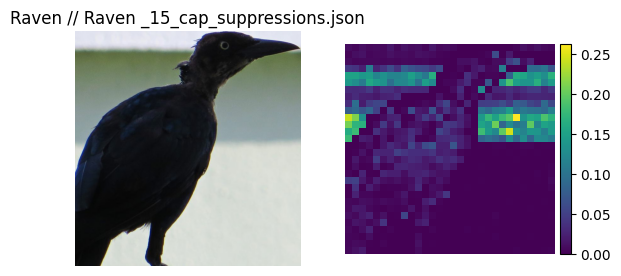

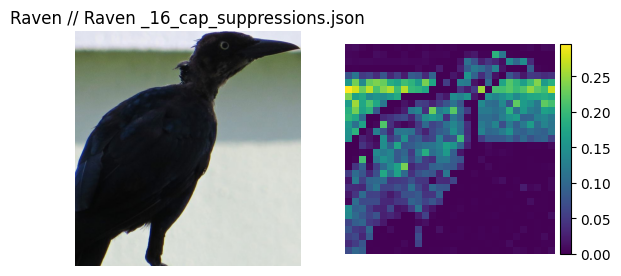

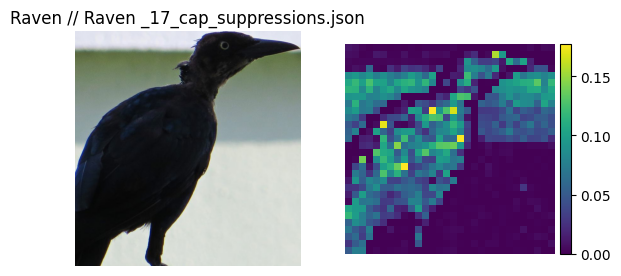

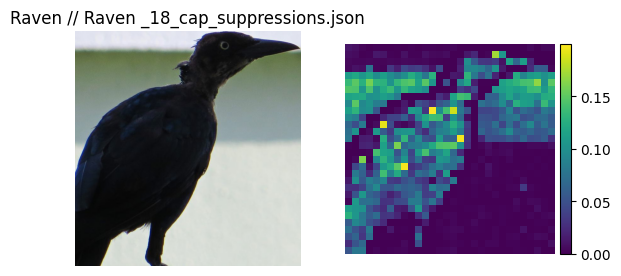

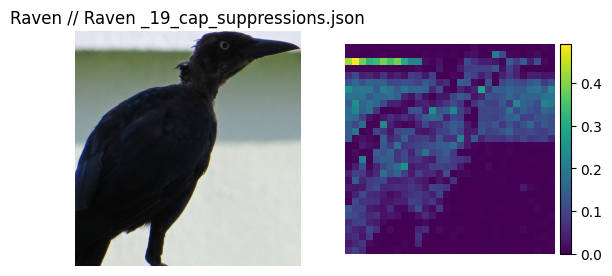

In [12]:
#suffix = '7_fix2' #failure
#suffix = '7_fix3' #better at least?
#suffix='8_AH' 
#suffix='18_cap_suppressions'

for p in glob.glob(f'/nfs/scratch_2/bjoern/atman_other_model/openimages-mini/Raven/images/*_explanation_*'):
    extract_img_heatmap(p)#, True)

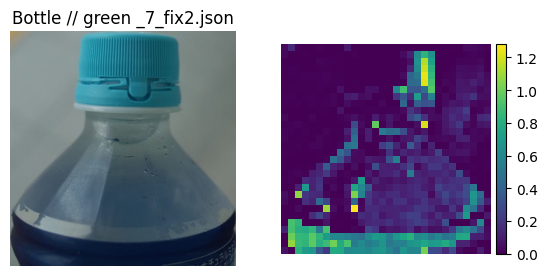

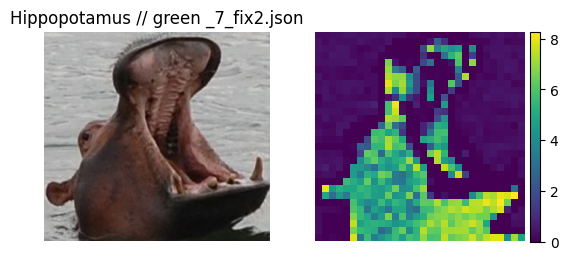

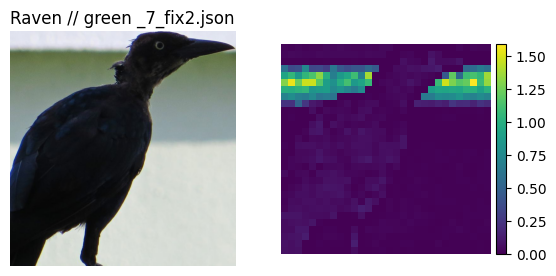

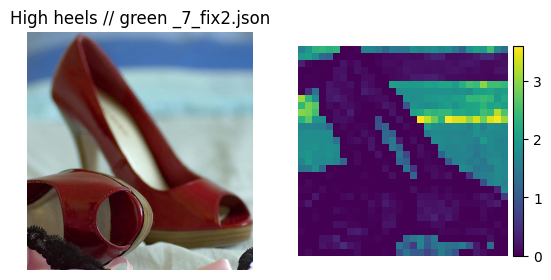

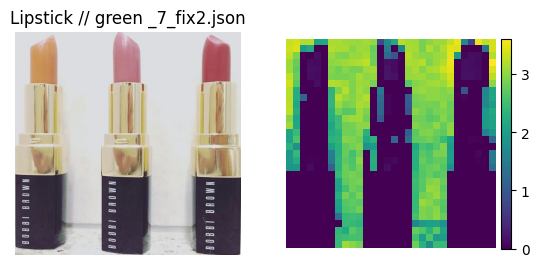

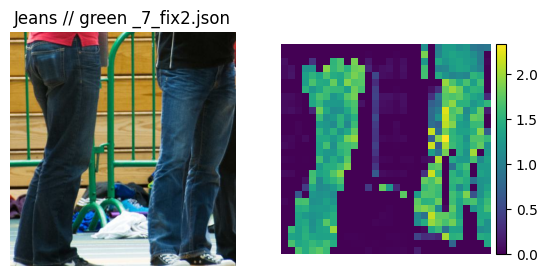

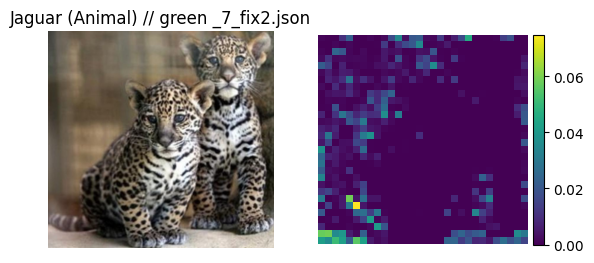

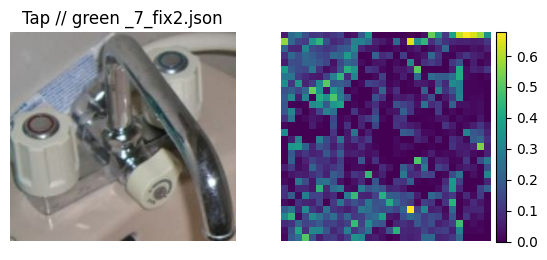

In [14]:
#suffix = '7_fix2' #failure
suffix = '7_fix2' #better at least?
#suffix='8_AH' 
#suffix='18_cap_suppressions'

for p in glob.glob(f'/nfs/scratch_2/bjoern/atman_other_model/openimages-mini/*/images/*_explanation_{suffix}*'):
    extract_img_heatmap(p)#, True)